In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'F:\pk\01_Data_science\ASSIGNMENTS\12_Naive_Bayes\SalaryData_Train.csv')

In [3]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [5]:
correlation = df.corr()

In [6]:
import seaborn as sns

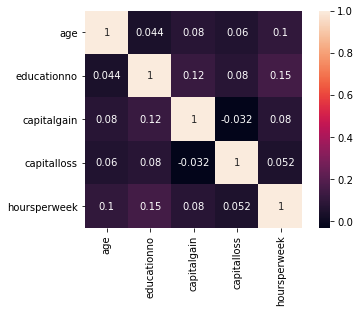

In [7]:
sns.heatmap(correlation, annot= True, square=True)

In [8]:
# label encoding

def label_encoding(data):
    
    from sklearn.preprocessing import LabelEncoder
    label_encoder = LabelEncoder()
    
    for i in data.select_dtypes(include=object).columns:
        data[i]= label_encoder.fit_transform(data.select_dtypes(include=object)[i]) 
        
    return data.head()

In [9]:
label_encoding(df)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [10]:
df.iloc[:,:-1]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37
30157,40,2,11,9,2,6,0,4,1,0,0,40,37
30158,58,2,11,9,6,0,4,4,0,0,0,40,37
30159,22,2,11,9,4,0,3,4,1,0,0,20,37


In [11]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

train_x = pd.DataFrame(scalar.fit_transform(df.iloc[:,:-1]), columns = df.iloc[:,:-1].columns)

In [12]:
train_y = df.iloc[:,-1:]

<function matplotlib.pyplot.show(*args, **kw)>

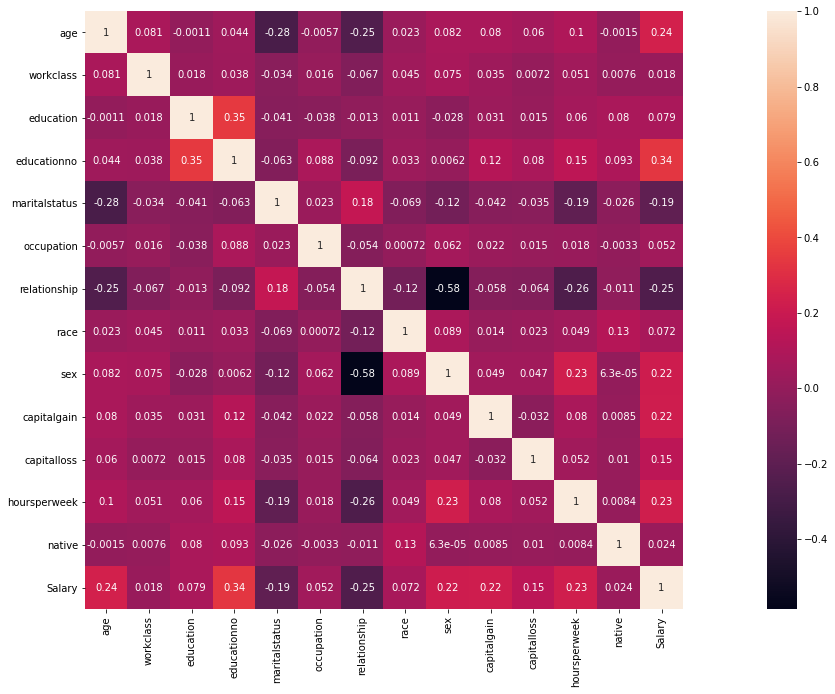

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,11)) 
sns.heatmap(df.corr(), annot= True, square=True,)
plt.show

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

model = GaussianNB()
model.fit(train_x,train_y)

In [15]:
mdl = GaussianNB()


In [16]:
mdl.fit(train_x, train_y)

C:\Users\PawanK\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [17]:
predicty = mdl.predict(train_x)

In [18]:
pred = pd.DataFrame(predicty, columns=['new_y'])

In [19]:
pred['train_y'] = train_y

In [20]:
def compare(x):
    if pred["new_y"] == pred["train_y"]:
        return true
    else:
        return false

In [21]:
pred['compare'] = pred["new_y"] == pred["train_y"]

In [22]:
pred['compare'].value_counts()

True     24056
False     6105
Name: compare, dtype: int64

In [23]:
testdf = pd.read_csv(r'F:\pk\01_Data_science\ASSIGNMENTS\12_Naive_Bayes\SalaryData_Test.csv')

In [24]:
# label encoding

label_encoding(testdf)

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

test_x = pd.DataFrame(scalar.fit_transform(testdf.iloc[:,:-1]), columns = testdf.iloc[:,:-1].columns)

test_y = testdf.iloc[:,-1:]

In [33]:
predtesty = mdl.predict(test_x)

In [34]:
predtest = pd.DataFrame(predtesty, columns=['testpred_y'])
predtest['test_y'] = test_y

In [35]:
predtest

,testpred_y,test_y
0,0,0
1,0,0
2,0,1
3,1,1
4,0,0
...,...,...
15055,0,0
15056,0,0
15057,0,0
15058,1,0


In [36]:
from sklearn.metrics import confusion_matrix, classification_report
test_cm = confusion_matrix(test_y, predtesty)

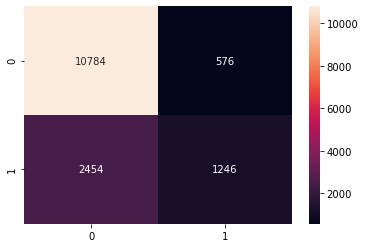

<Figure size 720x576 with 0 Axes>

In [37]:
#confusion matrix for test dataset

figure, ax2 = plt.subplots(1,1)
plt.figure(figsize=(10,8))
sns.heatmap(test_cm, annot=True, ax = ax2, fmt = 'g')
plt.show()

In [41]:
train_score = mdl.score(train_x, train_y).round(3)
test_score = mdl.score(test_x, test_y).round(3)

result_df = pd.DataFrame({'parameters':['train_score', 'test_score',],\
                         'score':[train_score, test_score,]})

In [42]:
result_df

,parameters,score
0,train_score,0.798
1,test_score,0.799
